In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('imdb_database.csv', header=0, sep=";")
data[['year_release']] = [int(x.split(" ")[-1])  for x in data['release_date']]
data.head()
#data.info()

,Unnamed: 0,movie_name,description,director_name,rating,genre_list,stars_actors_list,user_reviews,critic_reviews,metascore,country_release_date,release_date,duration,filming_dates_initial,filming_dates_final,year_release
0,0,El padrino,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,9.2,"['Crime', 'Drama']","['Marlon Brando', 'Al Pacino', 'James Caan', '...",4.6K,267,100,USA\n,14 March 1972,175,29 March 1971,6 August 1971,1972
1,1,El padrino: Parte II,The early life and career of Vito Corleone in ...,Francis Ford Coppola,9.0,"['Crime', 'Drama']","['Al Pacino', 'Robert De Niro', 'Robert Duvall...",1.2K,189,90,USA\n,12 December 1974,202,1 October 1973,19 June 1974,1974
2,2,El caballero oscuro,When the menace known as the Joker wreaks havo...,Christopher Nolan,9.0,"['Action', 'Crime', 'Drama']","['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",7.6K,434,84,Argentina\n,14 July 2008,152,18 April 2007,11 November 2007,2008
3,3,Pulp Fiction,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,8.9,"['Crime', 'Drama']","['John Travolta', 'Uma Thurman', 'Samuel L. Ja...",3.3K,301,94,France\n,21 May 1994,154,20 September 1993,30 November 1993,1994
4,4,Heat,A group of high-end professional thieves start...,Michael Mann,8.2,"['Crime', 'Drama', 'Thriller']","['Al Pacino', 'Robert De Niro', 'Val Kilmer', ...",1.1K,224,76,USA\n,6 December 1995,170,21 February 1995,19 July 1995,1995


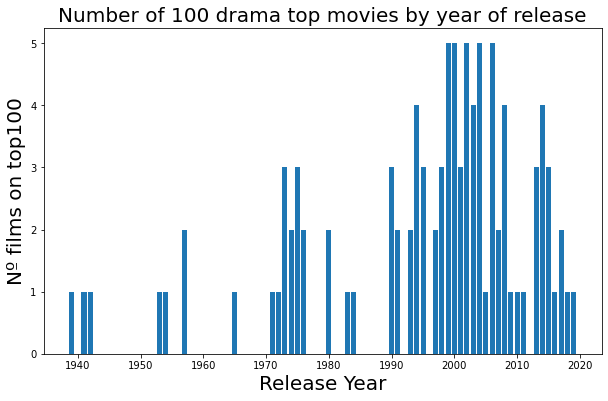

In [49]:
data2 = data.groupby(data['year_release'])['movie_name'].count()
fig= plt.figure(figsize=(10,6))
ax= fig.add_subplot(1,1,1)
#set x axis
#xlabels = range(13)
ax.set_xlabel("Release Year", fontsize=20)
#ax.set_xticks(xlabels)
#ax.set_xticklabels(xlabels, fontsize=20 )
#set y axis
#ylabels = range(100000,600000,100000)
ax.set_ylabel("Nº films on top100", fontsize=20)
#ax.set_yticks(ylabels)
#ax.set_yticklabels(ylabels, fontsize=20 )
#ax.set_ylim(100000,500000)

ax.set_title("Number of 100 drama top movies by year of release", fontsize=20)
ax.bar(data2.index.values,data2.values)
plt.show()

year_release
1939    8.1
1941    8.3
1942    8.5
1953    8.0
1954    8.1
Name: rating, dtype: float64


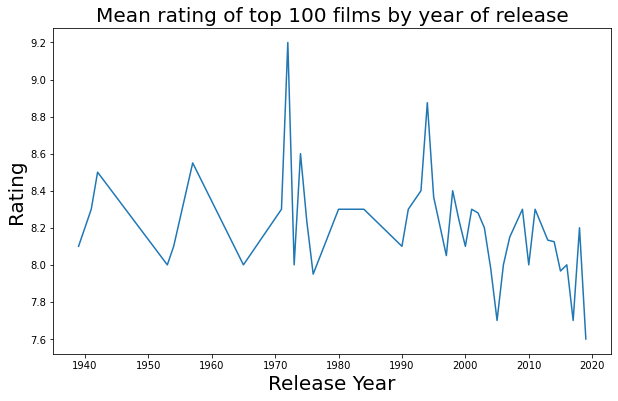

In [45]:
data3 = data.groupby(data['year_release'])['rating'].mean()
print(data3.head())
fig= plt.figure(figsize=(10,6))
ax= fig.add_subplot(1,1,1)
#set x axis
ax.set_xlabel("Release Year", fontsize=20)

#set y axis
ax.set_ylabel("Rating", fontsize=20)

ax.set_title("Mean rating of top 100 films by year of release", fontsize=20)
ax.plot(data3.index.values,data3.values)
plt.show()

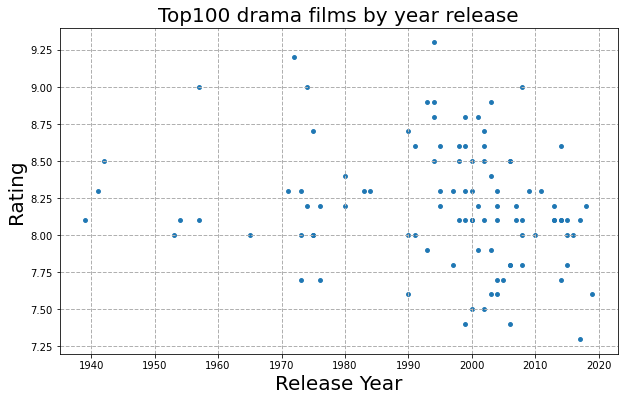

In [50]:
fig= plt.figure(figsize=(10,6))
ax= fig.add_subplot(1,1,1)
#set x axis
ax.set_xlabel("Release Year", fontsize=20)

#set y axis
ax.set_ylabel("Rating", fontsize=20)

ax.set_title("Top100 drama films by year release", fontsize=20)
ax.scatter(data['year_release'],data['rating'], s=15 )
ax.grid(linestyle='--', linewidth=1)
plt.show()

In [64]:
data4 = data.groupby(data['director_name'])['movie_name'].count().sort_values(ascending=False)
print(data4.head(50))

director_name
Martin Scorsese          6
Alejandro G. Iñárritu    5
Steven Spielberg         4
David Fincher            4
Quentin Tarantino        4
Peter Jackson            3
Stanley Kubrick          3
Sidney Lumet             3
Francis Ford Coppola     3
Christopher Nolan        3
Clint Eastwood           3
Giuseppe Tornatore       2
Mel Gibson               2
Frank Darabont           2
David Lean               2
Darren Aronofsky         2
Brian De Palma           2
Roman Polanski           2
Billy Wilder             1
James Cameron            1
Guillermo del Toro       1
Ang Lee                  1
George Roy Hill          1
Franklin J. Schaffner    1
Asghar Farhadi           1
Bernardo Bertolucci      1
Danny Boyle              1
Jonathan Dayton          1
Fernando Meirelles       1
Ethan Coen               1
Elia Kazan               1
Denis Villeneuve         1
David Lynch              1
Damien Chazelle          1
Jean-Pierre Jeunet       1
Wes Anderson             1
Jonathan Demme

In [73]:
actors={}
for el in data['stars_actors_list']:
    el = el.split(",")
    for i in el:
        i = i.replace('[',"").replace(']',"").replace("'","")
        try:
            actors[i]+=1
        except:
            actors[i]=1
sorted_actors = sorted(actors.items(), key=lambda kv: kv[1], reverse=True)
sorted_actors

[('Al Pacino', 7),
 ('Leonardo DiCaprio', 7),
 (' Cate Blanchett', 5),
 ('Robert De Niro', 5),
 ('Brad Pitt', 4),
 (' Diane Keaton', 3),
 (' Talia Shire', 3),
 (' John Cazale', 3),
 (' Rudy Bond', 3),
 (' Richard Bright', 3),
 (' Michael Caine', 3),
 (' Gary Oldman', 3),
 (' Morgan Freeman', 3),
 (' Bernard Hill', 3),
 ('Elijah Wood', 3),
 (' Ian McKellen', 3),
 (' Orlando Bloom', 3),
 (' Sean Astin', 3),
 (' Billy Boyd', 3),
 ('Tom Hanks', 3),
 (' Viggo Mortensen', 3),
 (' Mark Margolis', 3),
 (' Marcia Jean Kurtz', 3),
 (' Edward Norton', 3),
 (' Brad Pitt', 3),
 (' Joe Pesci', 3),
 ('Jack Nicholson', 3),
 (' Paul Dano', 3),
 ('Marlon Brando', 2),
 (' Al Pacino', 2),
 (' Robert Duvall', 2),
 (' Sterling Hayden', 2),
 (' Morgana King', 2),
 (' Robert De Niro', 2),
 (' Frank Sivero', 2),
 ('Christian Bale', 2),
 (' Heath Ledger', 2),
 (' Tim Roth', 2),
 (' Tom Sizemore', 2),
 (' Ted Levine', 2),
 (' William Fichtner', 2),
 (' Natalie Portman', 2),
 (' Danny Aiello', 2),
 ('Russell Crow